In [1]:
#Python Library for Dataframe usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Serializing to a file
import _pickle as pickle

#Libraries for Graph
import networkx as nx
from src.communities.communities import find_communities_n, find_communities_modularity

#etc. 
from collections import Counter

In [2]:
#Opening the pickled file
#Needs to be opened in the recommender folder
pickle_in = open("./data/graph/molecule_full_graph.pickle","rb")

#Getting the dictionary from the pickle
pickled_G = pickle.load(pickle_in)

#Converting a dictionary of dictionaries to a graph
G = pickled_G

#For if you want to use the small subset in stead
pickle_in = open("./data/graph/molecule_subset_graph.pickle","rb")

#Getting the dictionary from the pickle
pickled_G = pickle.load(pickle_in)

#Converting a dictionary of dictionaries to a graph
G = pickled_G

In [3]:
print("Number of edges: ", G.number_of_edges())

Number of edges:  58968


In [4]:
print("Number of nodes: ", G.number_of_nodes())

Number of nodes:  2587


In [5]:
#returns a dictionary based on attributes
ingredient_node_attribute = nx.get_node_attributes(G, 'ingredient_node')
molecule_node_attribute = nx.get_node_attributes(G, 'molecule_node')

In [6]:
#list of ingredients
ingredient_list = []
for node, boolean in ingredient_node_attribute.items():    
    if boolean == True:
        ingredient_list.append(node)

#list of non ingredients
molecule_list = []
for node, boolean in molecule_node_attribute.items():   
    if boolean == True:
        molecule_list.append(node)

In [7]:
print("number of ingredients: ", len(ingredient_list))

number of ingredients:  809


In [8]:
print("number of molecules: ", len(molecule_list))

number of molecules:  1778


degree of all nodes:

In [9]:
degree_dict = dict(G.degree())
degree_series = pd.Series(degree_dict)
degree_series.describe()

count    2587.000000
mean       45.587940
std        84.041285
min         1.000000
25%         2.000000
50%         7.000000
75%        53.500000
max       614.000000
dtype: float64

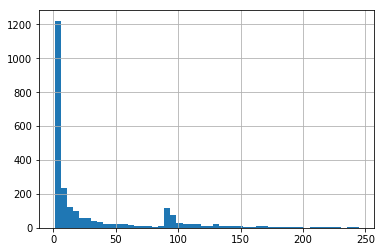

In [10]:
degree_series[degree_series < 250].hist(bins=50)

In [ ]:
ingredient_centrality = []
for tup in Counter(nx.degree_centrality(G)).most_common():
    if tup[0] in ingredient_list:
        ingredient_centrality.append(tup)
print("Ingredients with highest centrality: ")
print(ingredient_centrality)

In [11]:
molecule_centrality = []
for tup in Counter(nx.degree_centrality(G)).most_common():
    if tup[0] in molecule_list:
        molecule_centrality.append(tup)
print("Molecules with highest centrality: ")
print(molecule_centrality)


Molecules with highest centrality: 
[('CID 644104', 0.23743232791956692), ('thiamine', 0.20030935808197992), ('2-Phenylethanol', 0.1782675947409126), ('Isobutyraldehyde', 0.1751740139211137), ('3-Methyl-1-butanol', 0.17324052590873937), ('phenylacetaldehyde', 0.17053364269141533), ('betaine', 0.1697602474864656), ('3-Methylbutanal', 0.168600154679041), ('Phenethyl acetate', 0.16821345707656613), ('2,3-butanedione', 0.16705336426914155), ('Octanal', 0.16589327146171695), ('Propionaldehyde', 0.16550657385924208), ('indole', 0.16434648105181748), ('4-hydroxybenzaldehyde', 0.16357308584686775), ('2-Methylbutyraldehyde', 0.1620262954369683), ('Hexanal', 0.16163959783449344), ('methanethiol', 0.1608662026295437), ('3-methylthiopropanol', 0.1608662026295437), ('vanillin', 0.1597061098221191), ('3-(Methylthio)propionaldehyde', 0.15931941221964424), ('salicylic acid', 0.1585460170146945), ('cis-3-Hexenyl acetate', 0.15699922660479507), ('Geraniol', 0.15583913379737047), ('6-Methyl-5-Hepten-2-On

In [12]:
print("Connected components: ", nx.number_connected_components(G))

Connected components:  1


In [13]:
for comp in nx.connected_components(G):
    print(comp)

{'Safflower', 'Benzyl butyl ether', 'Naringen', '(-)-alpha-Terpineol', 'Bittergourd', '2-Ethyl-4-hydroxy-5-methyl-3(2H)-furanone', 'Biphenyl', '3,7-Dimethyl-1-octanol', 'Topping', 'Bamboo shoots', 'CID 9989713', 'Bitter Orange', 'Aromadendrene', 'Isopinocamphone', 'Ethyl 2-octenoate', '23726-92-3', '2,5-Dimethylpyrazine', '3-Oxo-alpha-ionol', 'alpha-Muurolene', '.alpha.-Campholenyl acetate', 'Fenugreek', '4-Decenoic acid', 'Mandarin Orange Peel Oil', 'Ethyl trans-2-decenoate', 'Bottlegourd', 'Guaiol', 'beta-Bisabolol', 'Chavicol', '(1-Bromovinyl)benzene', 'Ethyl palmitoleate', 'Prunetin', 'Diphenyl oxide', 'Octan-2-one', 'Port Wine', 'Amaranth', 'Phytyl acetate', '1-propanol', 'Isoquinoline', 'Cocoa butter', 'Sauce', 'Milk Fat', '4-Methyl-2-oxovaleric acid', 'Champagne', 'Provolone Cheese', 'Alpha-Pinene', 'Isobutyl heptanoate', 'Banana', '1-Chlorooctadecane', 'S-Methyl propanethioate', 'Alaska blackfish', '2,4-dihydroxybenzoic acid', '1,1,6-Trimethyl-1,2-dihydronaphthalene', 'Clove Oi

Out of the three connected components, two are:
- {'Oxacycloheptadec-7-en-2-one', 'Muskmallow'}
- {'Cinnamyl cinnamate', 'Storax'}

The rest are all connected together

In [15]:
nx.degree_centrality(G)

{'Egg': 0.021268368136117557,
 'indole': 0.16434648105181748,
 'lactic acid': 0.03054911059551431,
 '3-Hexanone': 0.1500386697602475,
 'Dimethyl disulfide': 0.038283062645011606,
 'l-Menthol': 0.014694508894044857,
 'Octanal': 0.16589327146171695,
 '1-Penten-3-Ol': 0.026295436968290797,
 '2-Pentylfuran': 0.029389017788089715,
 'Diethyl sulfide': 0.003480278422273782,
 '50-69-1': 0.003480278422273782,
 'Styrene': 0.040603248259860794,
 '3-Methylbutanal': 0.168600154679041,
 '3-Methylindole': 0.006960556844547564,
 'Tiglic aldehyde': 0.0197215777262181,
 'thiamine': 0.20030935808197992,
 'Dl-Phenylalanine': 0.01894818252126837,
 'Nonanal': 0.06109822119102862,
 'Heptanoic Acid': 0.15197215777262182,
 'phenol': 0.04021655065738593,
 'octanoic acid': 0.051430781129157,
 'P-Cresol': 0.013147718484145398,
 'm-cresol': 0.006960556844547564,
 '4-Methyl-2-pentanone': 0.020881670533642694,
 'L-arginine': 0.010054137664346482,
 '2,3-Pentanedione': 0.024361948955916476,
 '2,5-Dimethylfuran': 0.003

In [14]:
nx.betweenness_centrality(G)

{'Egg': 0.0005193096634831877,
 'indole': 0.009794151429768312,
 'lactic acid': 0.0006912980768977702,
 '3-Hexanone': 0.0059352001047018495,
 'Dimethyl disulfide': 0.0010938132051356902,
 'l-Menthol': 0.0004372499538742716,
 'Octanal': 0.00827014850622798,
 '1-Penten-3-Ol': 0.0009993770513598706,
 '2-Pentylfuran': 0.0013560314701141715,
 'Diethyl sulfide': 3.2899567750225425e-05,
 '50-69-1': 0.0007988147525657213,
 'Styrene': 0.0015112336990965479,
 '3-Methylbutanal': 0.008552303481604621,
 '3-Methylindole': 0.0002310499746481125,
 'Tiglic aldehyde': 0.0006247041413051497,
 'thiamine': 0.05490168557579277,
 'Dl-Phenylalanine': 0.0008757015871867918,
 'Nonanal': 0.004923885383242754,
 'Heptanoic Acid': 0.031541614541187354,
 'phenol': 0.001449393732838144,
 'octanoic acid': 0.0032544728607193604,
 'P-Cresol': 0.0003956138844537704,
 'm-cresol': 7.645143777980819e-05,
 '4-Methyl-2-pentanone': 0.0005611483881232173,
 'L-arginine': 1.5897306843818922e-05,
 '2,3-Pentanedione': 0.00058379890

In [ ]:
# eigenvector centrality returns Power Iteration Failed Convergance Error
# nx.eigenvector_centrality(G)

communities = find_communities_n(G, 1)
print(len(communities))
print(communities)

best_communities_set = find_communities_modularity(G)
print(len(best_communities_set))
print(best_communities_set)